In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.model_selection import train_test_split



c:\Users\ediad\AppData\Local\Programs\Python\Python314\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Baixar o dataset do Kaggle
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("Path to dataset files:", path)

# Carregar o arquivo CSV
csv_path = path + "/StudentsPerformance.csv"
df = pd.read_csv(csv_path)
df.head()

Path to dataset files: C:\Users\ediad\.cache\kagglehub\datasets\spscientist\students-performance-in-exams\versions\1


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
os.makedirs('imagens', exist_ok=True)
desc_stats = df.describe(include='all')
desc_stats.to_csv('csv/analise_exploratoria.csv')
desc_stats

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


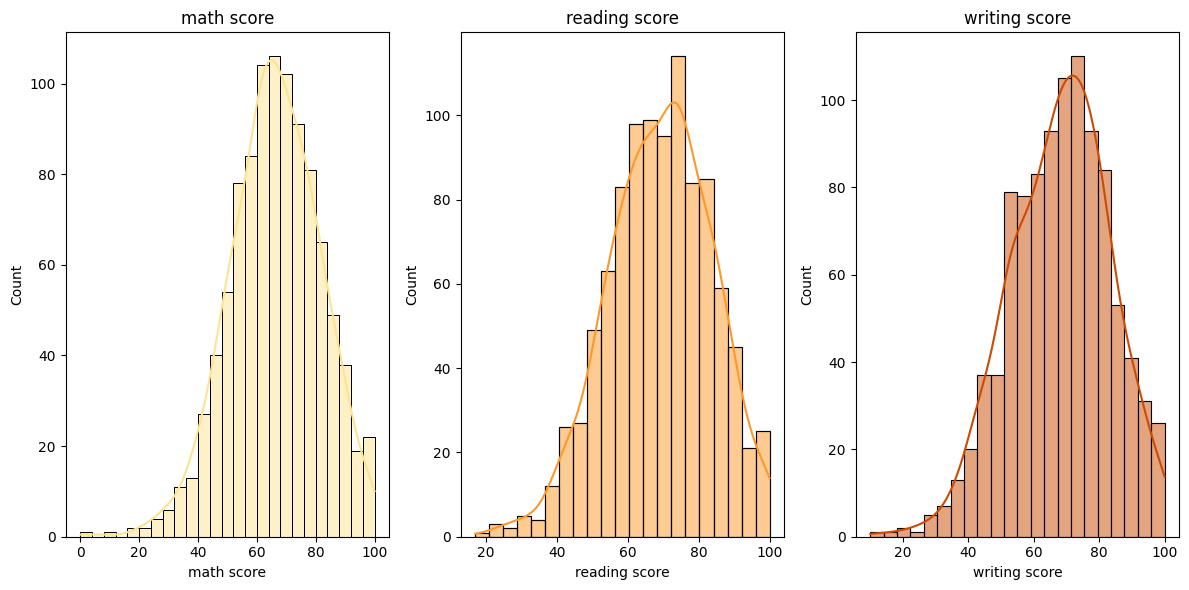

In [5]:
os.makedirs('imagens', exist_ok=True)
plt.figure(figsize=(12,6))
for i, col in enumerate(["math score", "reading score", "writing score"]):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color=sns.color_palette("YlOrBr", 3)[i])
    plt.title(col)
plt.tight_layout()
plt.savefig('imagens/visualizacao_notas.png', format='png')
plt.show()

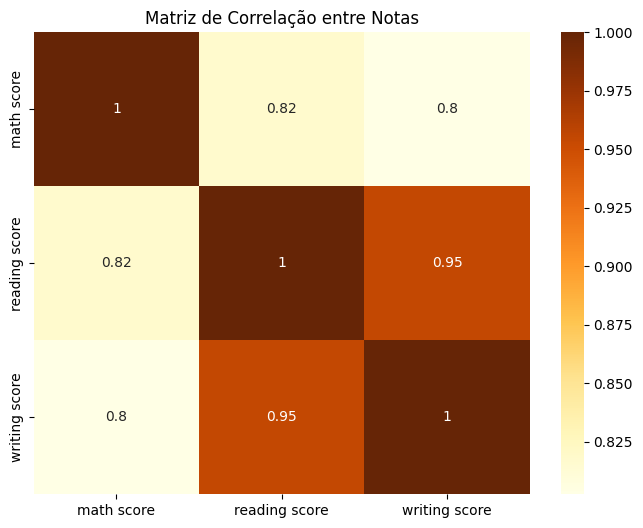

In [10]:
os.makedirs('imagens', exist_ok=True)
plt.figure(figsize=(8,6))
sns.heatmap(df[["math score", "reading score", "writing score"]].corr(), annot=True, cmap='YlOrBr')
plt.title('Matriz de Correlação entre Notas')
plt.savefig('imagens/correlacao_notas.png', format='png')
plt.show()


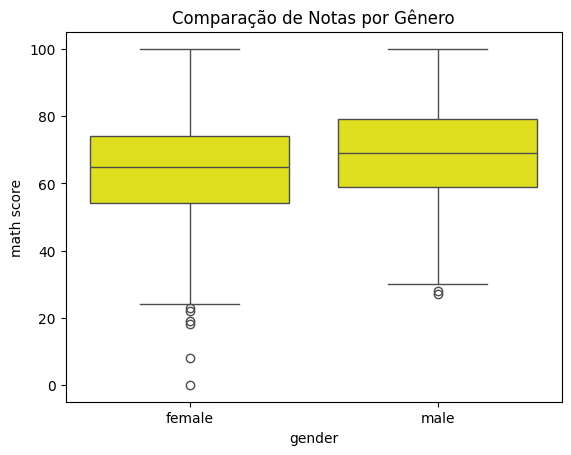

In [7]:
os.makedirs('imagens', exist_ok=True)
sns.boxplot(x='gender', y='math score', data=df, color='Yellow')
plt.title('Comparação de Notas por Gênero')
plt.savefig('imagens/comparacao_grupos.png', format='png')
plt.show()

In [8]:
os.makedirs('csv', exist_ok=True)
missing = df.isnull().sum()
missing.to_csv('csv/valores_ausentes.csv')
missing

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
# Preenchimento de valores ausentes (se houver) apenas nas colunas numéricas
for col in ["math score", "reading score", "writing score"]:
    df[col] = df[col].fillna(df[col].mean())

In [12]:
# Normalização das notas
os.makedirs('csv', exist_ok=True)


scaler = MinMaxScaler()
df[["math score", "reading score", "writing score"]] = scaler.fit_transform(df[["math score", "reading score", "writing score"]])
df.head().to_csv('csv/dados_normalizados.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111
1,female,group C,some college,standard,completed,0.69,0.879518,0.866667
2,female,group B,master's degree,standard,none,0.90,0.939759,0.922222
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778
4,male,group C,some college,standard,none,0.76,0.734940,0.722222


In [13]:

os.makedirs('csv', exist_ok=True)
target = "math score"
features = [col for col in df.columns if col not in [target]]

X = pd.get_dummies(df[features], drop_first=True)
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pd.DataFrame(X_train).to_csv('csv/X_train.csv')
pd.DataFrame(X_test).to_csv('csv/X_test.csv')
pd.DataFrame(y_train).to_csv('csv/y_train.csv')
pd.DataFrame(y_test).to_csv('csv/y_test.csv')

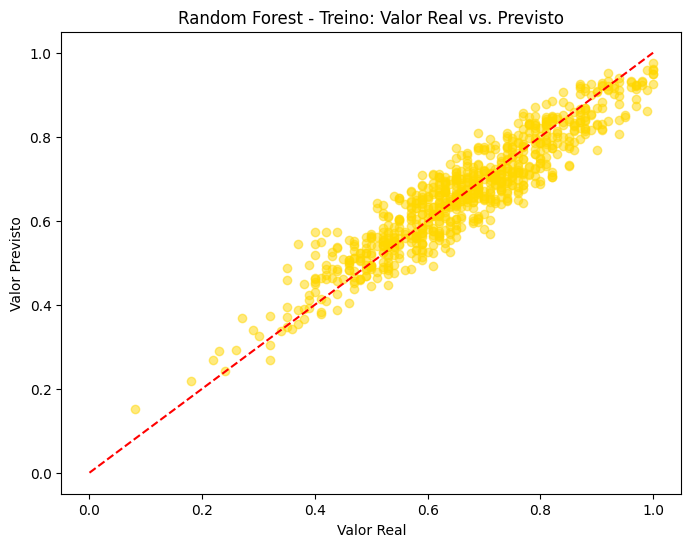

In [23]:
# Treinamento do Random Forest
os.makedirs('imagens', exist_ok=True)

rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)


# Plotando valores reais vs. previstos
y_pred_train = rf.predict(X_train)
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_pred_train, alpha=0.5, color='gold')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Random Forest - Treino: Valor Real vs. Previsto')
plt.plot([0, 1], [0, 1], 'r--')
plt.savefig('imagens/modelo_random_forest.png', format='png')
plt.show()


In [26]:

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
with open('csv-txt/avaliacao_modelo.txt', 'w') as f:
    f.write(f'MSE: {mse}\nR²: {r2}')
print('MSE:', mse)
print('R²:', r2)

MSE: 0.0034670033821955553
R²: 0.8575233755874307


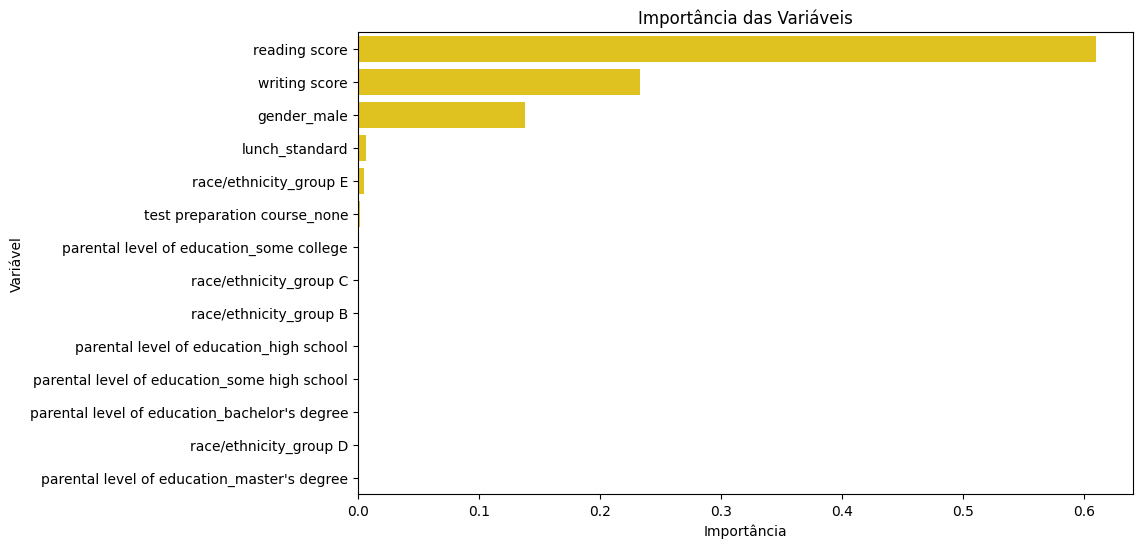

In [25]:
os.makedirs('imagens', exist_ok=True)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index, color='gold')
plt.title('Importância das Variáveis')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.savefig('imagens/importancia_variaveis.png', format='png')
plt.show()
